In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("breast_cancer.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df['diagnosis'] = df['diagnosis'].map({'B':0,'M':1})

In [5]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [6]:
df_corr  = df.corr(numeric_only=True)

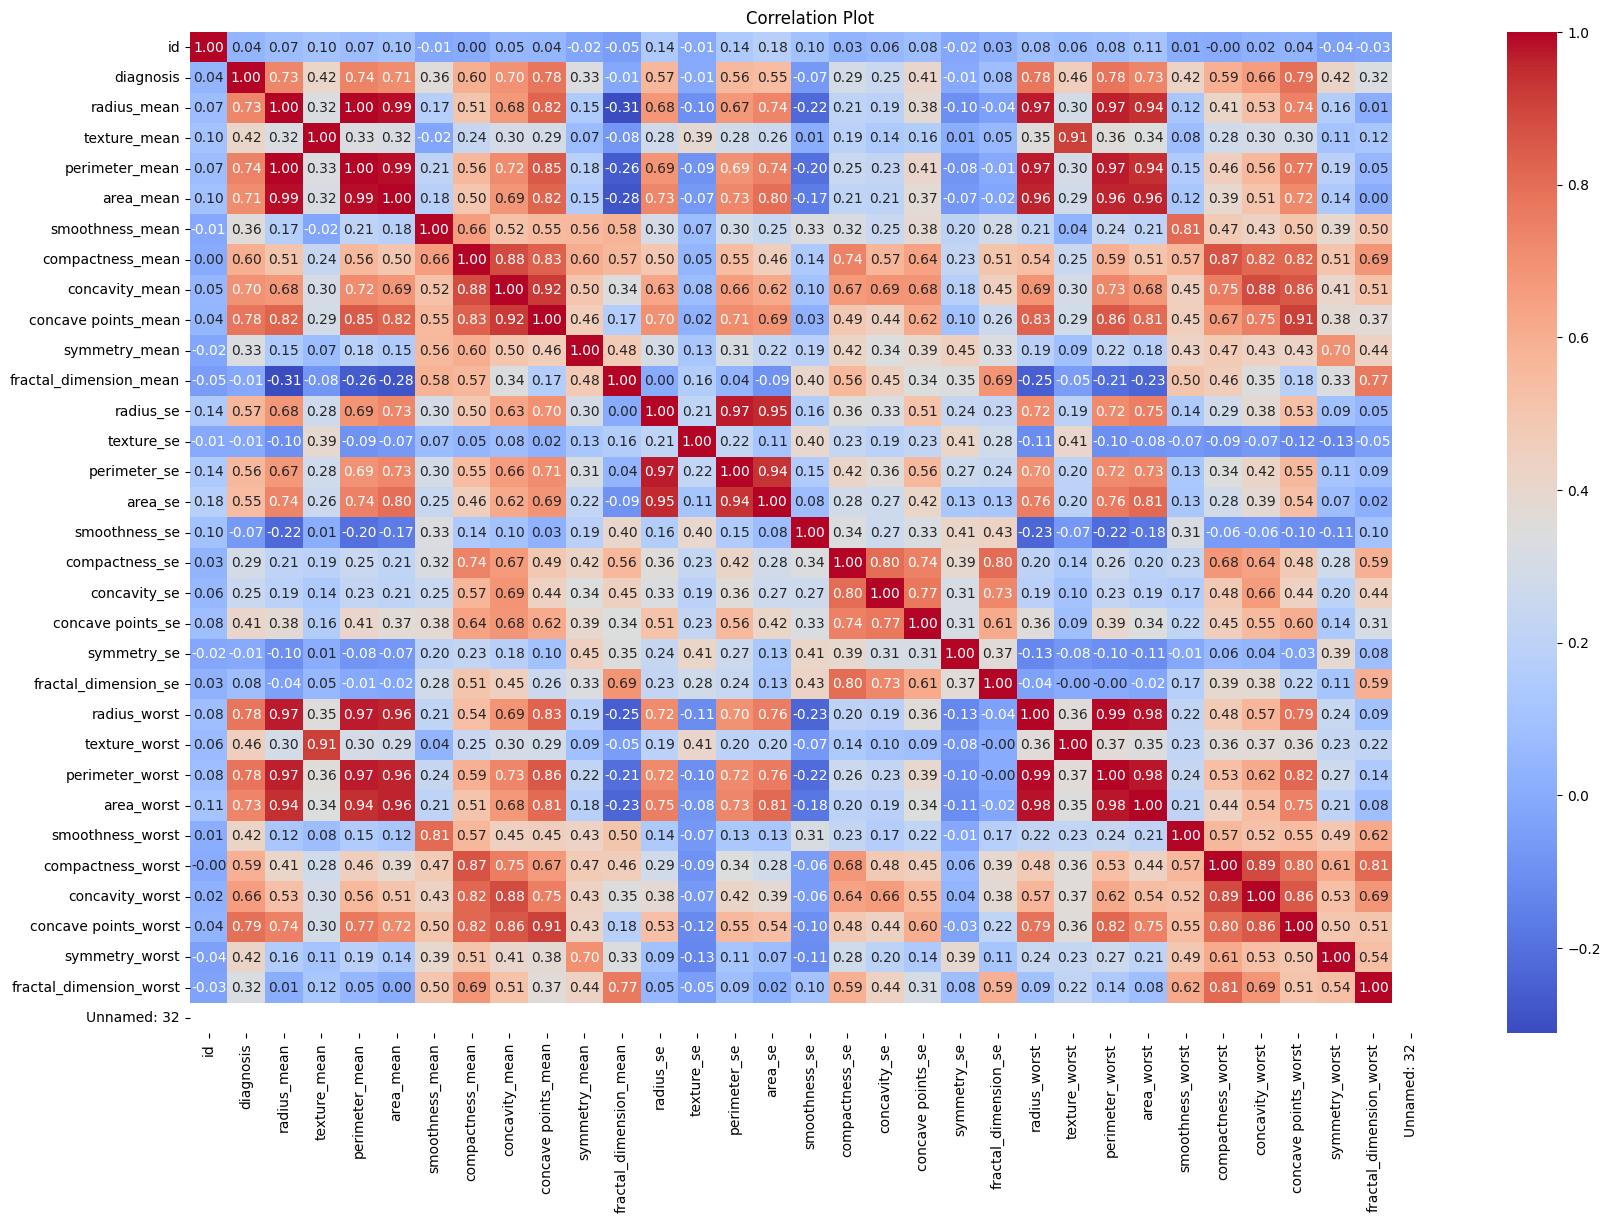

In [7]:
plt.figure(figsize=(20, 13))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Plot")
plt.show()

In [8]:
corr = df.corr()
corr_target = corr['diagnosis'].abs().sort_values(ascending=False)
print(corr_target.head(15))


diagnosis               1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
compactness_mean        0.596534
compactness_worst       0.590998
radius_se               0.567134
perimeter_se            0.556141
Name: diagnosis, dtype: float64


In [9]:
dfSig = df.drop(columns=["id","smoothness_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","smoothness_worst","compactness_worst","symmetry_worst","fractal_dimension_worst","Unnamed: 32"
])

In [10]:
dfSig.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_worst,texture_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst
0,1,17.99,10.38,122.80,1001.0,0.27760,0.3001,0.14710,25.38,17.33,184.60,2019.0,0.7119,0.2654
1,1,20.57,17.77,132.90,1326.0,0.07864,0.0869,0.07017,24.99,23.41,158.80,1956.0,0.2416,0.1860
2,1,19.69,21.25,130.00,1203.0,0.15990,0.1974,0.12790,23.57,25.53,152.50,1709.0,0.4504,0.2430
3,1,11.42,20.38,77.58,386.1,0.28390,0.2414,0.10520,14.91,26.50,98.87,567.7,0.6869,0.2575
4,1,20.29,14.34,135.10,1297.0,0.13280,0.1980,0.10430,22.54,16.67,152.20,1575.0,0.4000,0.1625


In [11]:
# dfSig['diagnosis'] = dfSig['diagnosis'].map({'B':0,'M':1})
# dfSig['diagnosis'] = dfSig['diagnosis'].map({'B':0,'M':1})
dfSig['diagnosis'] = dfSig['diagnosis'].replace({'B': 0, 'M': 1}).astype(int)

In [12]:
dfSig.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_worst,texture_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst
0,1,17.99,10.38,122.80,1001.0,0.27760,0.3001,0.14710,25.38,17.33,184.60,2019.0,0.7119,0.2654
1,1,20.57,17.77,132.90,1326.0,0.07864,0.0869,0.07017,24.99,23.41,158.80,1956.0,0.2416,0.1860
2,1,19.69,21.25,130.00,1203.0,0.15990,0.1974,0.12790,23.57,25.53,152.50,1709.0,0.4504,0.2430
3,1,11.42,20.38,77.58,386.1,0.28390,0.2414,0.10520,14.91,26.50,98.87,567.7,0.6869,0.2575
4,1,20.29,14.34,135.10,1297.0,0.13280,0.1980,0.10430,22.54,16.67,152.20,1575.0,0.4000,0.1625


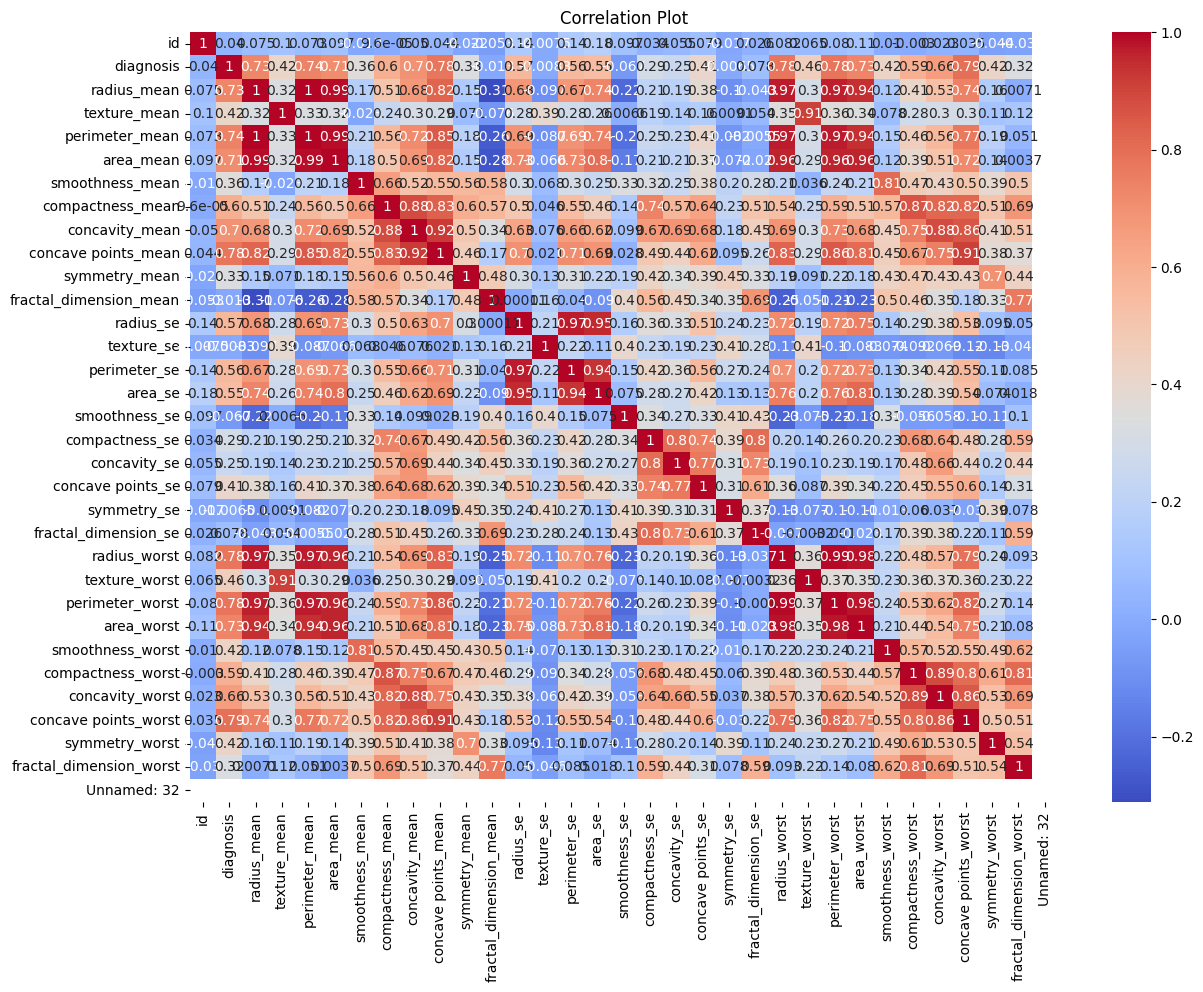

In [13]:
plt.figure(figsize=(14,10))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title("Correlation Plot")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [14]:
dfSig

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_worst,texture_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst
0,1,17.99,10.38,122.80,1001.0,0.27760,0.30010,0.14710,25.380,17.33,184.60,2019.0,0.7119,0.2654
1,1,20.57,17.77,132.90,1326.0,0.07864,0.08690,0.07017,24.990,23.41,158.80,1956.0,0.2416,0.1860
2,1,19.69,21.25,130.00,1203.0,0.15990,0.19740,0.12790,23.570,25.53,152.50,1709.0,0.4504,0.2430
3,1,11.42,20.38,77.58,386.1,0.28390,0.24140,0.10520,14.910,26.50,98.87,567.7,0.6869,0.2575
4,1,20.29,14.34,135.10,1297.0,0.13280,0.19800,0.10430,22.540,16.67,152.20,1575.0,0.4000,0.1625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11590,0.24390,0.13890,25.450,26.40,166.10,2027.0,0.4107,0.2216
565,1,20.13,28.25,131.20,1261.0,0.10340,0.14400,0.09791,23.690,38.25,155.00,1731.0,0.3215,0.1628
566,1,16.60,28.08,108.30,858.1,0.10230,0.09251,0.05302,18.980,34.12,126.70,1124.0,0.3403,0.1418
567,1,20.60,29.33,140.10,1265.0,0.27700,0.35140,0.15200,25.740,39.42,184.60,1821.0,0.9387,0.2650


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
dfSig

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_worst,texture_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst
0,1,17.99,10.38,122.80,1001.0,0.27760,0.30010,0.14710,25.380,17.33,184.60,2019.0,0.7119,0.2654
1,1,20.57,17.77,132.90,1326.0,0.07864,0.08690,0.07017,24.990,23.41,158.80,1956.0,0.2416,0.1860
2,1,19.69,21.25,130.00,1203.0,0.15990,0.19740,0.12790,23.570,25.53,152.50,1709.0,0.4504,0.2430
3,1,11.42,20.38,77.58,386.1,0.28390,0.24140,0.10520,14.910,26.50,98.87,567.7,0.6869,0.2575
4,1,20.29,14.34,135.10,1297.0,0.13280,0.19800,0.10430,22.540,16.67,152.20,1575.0,0.4000,0.1625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11590,0.24390,0.13890,25.450,26.40,166.10,2027.0,0.4107,0.2216
565,1,20.13,28.25,131.20,1261.0,0.10340,0.14400,0.09791,23.690,38.25,155.00,1731.0,0.3215,0.1628
566,1,16.60,28.08,108.30,858.1,0.10230,0.09251,0.05302,18.980,34.12,126.70,1124.0,0.3403,0.1418
567,1,20.60,29.33,140.10,1265.0,0.27700,0.35140,0.15200,25.740,39.42,184.60,1821.0,0.9387,0.2650


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = dfSig.drop(columns='diagnosis',axis=1)

In [20]:
y = dfSig['diagnosis']

In [21]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
X_train_sig = scaler.fit_transform(X_train)

In [23]:
X_test_sig = scaler.fit_transform(X_test)

In [24]:
X_train_scaled = pd.DataFrame(X_train_sig, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_sig, columns=X.columns)

In [25]:
X_train_scaled

,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_worst,texture_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst
0,0.355820,-1.726647,0.413031,0.206435,1.003954,1.447046,1.593877,0.511028,-1.409852,0.521794,0.373935,1.571401,1.056523
1,-0.373267,0.508813,-0.394700,-0.404509,-0.396650,-0.351529,-0.789623,-0.392232,0.241384,-0.473485,-0.414070,-0.432654,-0.896674
2,1.403358,-0.151449,1.347999,1.346734,0.446346,0.548645,1.076488,2.023321,0.428535,1.866926,2.175532,0.591964,1.463535
3,-0.479417,-0.448568,-0.483319,-0.499007,-0.529469,-0.670468,-0.658181,-0.462189,-0.200822,-0.437993,-0.480572,-0.337271,-0.136763
4,-0.482211,0.159817,-0.484132,-0.523181,-0.043498,-0.262323,-0.467040,-0.585641,-0.411160,-0.577874,-0.577302,-0.399521,-0.584631
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,-1.480026,-1.078175,-1.363815,-1.147585,0.957487,-0.037279,-0.526477,-1.352487,-1.636752,-1.340514,-1.038324,-0.635470,-1.022324
377,-0.711272,-0.208043,-0.697955,-0.684708,-0.037689,-0.231911,-0.365971,-0.651482,0.614030,-0.656017,-0.628430,0.086934,0.117619
378,0.028988,-0.564113,-0.082908,-0.080083,-1.488827,-1.035910,-1.114825,-0.287298,-0.811962,-0.389675,-0.347049,-1.161283,-1.246335
379,-0.057609,0.096149,-0.049575,-0.171010,0.186903,0.299019,0.413779,0.150959,0.869086,0.190730,-0.028013,0.687348,1.056523


### Stacking 

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [27]:
baselearner = [
    (
        "knn",
        Pipeline([
            ("scalar",StandardScaler()),
            ("knn",KNeighborsClassifier(n_neighbors=5))
        ])
    ),
    (
        "tree",
        DecisionTreeClassifier(max_depth=4, random_state=42)
    ),
    (
        "logreg",
        Pipeline([
            ("scaler", StandardScaler()),
            ("logreg", LogisticRegression(max_iter=1000))
        ])
    )
]

In [28]:
meta_learner = LogisticRegression(max_iter=1000)

In [29]:
stackingClassifier = StackingClassifier(
    estimators=baselearner,
    cv=2,
    final_estimator=meta_learner,
)

In [30]:
stackingClassifier.fit(X_train_scaled,y_train)

,estimators,"[('knn', ...), ('tree', ...), ...]"
,final_estimator,LogisticRegre...max_iter=1000)
,cv,2
,stack_method,'auto'
,n_jobs,None
,passthrough,False
,verbose,0
,copy,True
,with_mean,True
,with_std,True
,n_neighbors,5


In [31]:
y_pred = stackingClassifier.predict(X_test_scaled)

In [32]:
print("accuracy",round((accuracy_score(y_test,y_pred)*100),2))

accuracy 96.28


In [35]:
print(round((stackingClassifier.score(X_test_scaled,y_test)*100),2),"%")

96.28 %


In [36]:
import pickle

In [39]:
with open("model.pkl","wb") as file :
    pickle.dump(meta_learner,file)